<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Анна! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import phik

import numpy as np




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

    
    
- у тебя тут есть лишние импорты, то что ты не использовано или использовано не верно - стоит убрать, чтобы поберечь ресурсы      

    
- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 





<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

    
    
Не забываем оформить необходимые функции:
    
    
- функцию для выводы первичной инфо по таблице 
   (пропуски, дубли, название категорий….)
- функцию для построения гистограммы и ящика с усами 
   для каждого количественного фактора
- функцию для подсчета метрик    



<div class="alert alert-warning">


Совет 🤔:


- Можно включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru)  


- Код создания функции обычно оставляет под импортами, так их легче контролировать



## Описание проекта

Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Даны три датасета: 

1. ferma_main.csv содержит данные о стаде фермера на текущий момент. 
2. ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 
3. cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

### Цель
Разработать модель МО, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров.
Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:

1. Для прогнозирования возможного удоя коров (целевой признак Удой);
2. Для расчета вероятности получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Загрузка данных

Загрузим датафреймы. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')

In [4]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')

In [5]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет 🤔:



возможно не знаешь, но есть три аргумента parse_dates, sep, и decimal который можно использовать при чтении данных  в Pandas
- parse_dates позволяет указать, какие столбцы в DataFrame содержат даты и время
- sep позволяет указать разделитель между столбцами в файле
- decimal используется для определения символа, используемого в качестве разделителя десятичных знаков. Это важно, если в файле используется запятая (,) вместо точки (.) как разделитель десятичных знаков.


Используя эти аргументы, можно сразу корректно считывать данные из CSV (xlsx) файла







<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Спасибо! Не знала 👍
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Пожалуйста




</div>


##  Предобработка данных

Изучим признаки и данные. Определим, соответствуют ли они описанию задачи и изученным  стандартам оформления данных:

 - Рассмотрим каждый датафрейм,
 - Проверим на пропуски,
 - Проверим и избавимся от дубликатов,
 - Исправим типы данных
 

In [6]:
#ferma_main.head(10)
ferma_main.sample(10)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
154  155      6763                                   14.6              2126   
57    58      6601                                   15.7              2097   
275  276      5375                                   13.7              1712   
144  145      6373                                   14.2              1958   
56    57      5643                                   13.4              2041   
229  230      5877                                   12.5              1926   
187  188      6513                                   14.9              1813   
599  600      6968                                   16.4              2041   
330  331      5989                                   13.6              1913   
621  622      6201                                   14.3              1840   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
154                                 0.930   Вис Бик Айдиал    Холмистое   
57                                  0.930   Вис Бик Айдиал    Холмистое   
275                                 0.890  РефлешнСоверинг    Равнинное   
144                                 0.930   Вис Бик Айдиал    Холмистое   
56                                  0.895  РефлешнСоверинг    Холмистое   
229                                 0.890   Вис Бик Айдиал    Холмистое   
187                                 0.930   Вис Бик Айдиал    Холмистое   
599                                 0.950  РефлешнСоверинг    Холмистое   
330                                 0.880   Вис Бик Айдиал    Равнинное   
621                                 0.940   Вис Бик Айдиал    Равнинное   

    порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
154           Айдиал        3.72    3.075   не вкусно  более_2_лет  
57           Айдиалл        3.73    3.081      вкусно  более_2_лет  
275          Соверин        3.27    3.076      вкусно  менее_2_лет  
144           Айдиал        3.58    3.078   не вкусно  более_2_лет  
56           Айдиалл        3.53    3.077      вкусно  более_2_лет  
229           Айдиал        3.27    3.078      вкусно  более_2_лет  
187           Айдиал        3.62    3.075   не вкусно  более_2_лет  
599           Айдиал        3.71    3.075      вкусно  более_2_лет  
330          Соверин        3.72    3.074      вкусно  более_2_лет  
621           Айдиал        3.64    3.080   не вкусно  более_2_лет

In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Преобразуем тип данным на float в столбцах с числами с плавающей запятой.

In [8]:
#columns= ['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']

#for column in columns: 
#    ferma_main[column] = ferma_main[column].apply(lambda x: x.replace(',', '.')).astype('float')
#ferma_main.info()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Выше написал как это можно сделать сразу при загрузке


Пропусков в таблице нет. Проверим на дубликаты и, при их наличии, удалим эти строки.

In [9]:
ferma_main.duplicated().sum()

5

In [10]:
ferma_main = ferma_main.drop_duplicates()

Проверим уникальные значения категориальных признаков

In [11]:
cat_col_names = ['Порода', 
                 'Тип пастбища', 
                 'порода папы_быка', 
                 'Вкус молока', 
                 'Возраст']
for name in cat_col_names: 
    print(ferma_main[name].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


Проведем замену 'Равнинные' на 'Равнинное', а также 'Айдиалл' на 'Айдиал'.

In [12]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Равнинные', 'Равнинное' )
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].replace('Айдиалл', 'Айдиал' )

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех:


    
Здорово что обращено внимание на явные и скрытые дубликаты    
    
    
    

<div class="alert alert-warning">

Совет: 


    
 
    
    
    
Как можно отлавливать такого рода описки автоматически?! 
    
    

    
- использовать левенштейнское расстояние, меру различия между двумя строками. Если расстояние ниже определенного порога, это может быть потенциальный описок (например имена отличаются только одной буквой).

- регулярные выражения: например, регулярное выражение которое найдет слова с повторяющимися буквами внутри слова
   

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Спасибо! Почитала, интересно, но так и не поняла как ее применить 👍
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Это отдельная большая тема. Ниже я привёл игрушечный пример, ты как можно найти Равннинные, который отличается от  который отличается от Равнинные на 1 букву. Это схема,  конечно надо дорабатывать


In [13]:
!pip install python-Levenshtein

import Levenshtein

def find_one_letter_difference(word, text):
    words = text.split()
    similar_words = [w for w in words if Levenshtein.distance(word, w) == 1]
    return similar_words

# Пример использования функции
word = "Равнинные"
text = "Равннинные поля реяют над знаменами третьей империи"
result = find_one_letter_difference(word, text)
print("Слова, отличающиеся от 'Равнинные' на одну букву:", result)


Слова, отличающиеся от 'Равнинные' на одну букву: ['Равннинные']


Проверка после изменений:

In [14]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [15]:
ferma_dad.sample(10)

id  Имя Папы
287  288  Соловчик
562  563  Соловчик
502  503  Соловчик
118  119  Соловчик
329  330     Барин
269  270  Соловчик
92    93     Барин
450  451    Буйный
156  157    Буйный
223  224  Геркулес

In [16]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Во втором датафрейме пропусков нет, количество срок совпадает с количеством строк в первом датафрейме.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Плюс за проверку




</div>


In [17]:
#ferma = ferma_main.merge(ferma_dad)
#ferma.info()

In [18]:
cow_buy

Порода Тип пастбища порода папы_быка  Имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    холмистое          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Барин   
15  РефлешнСоверинг    холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    равнинное          Соверин    Буйный   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

    Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                 3.58                    3.076  более_2_лет  
1                 3.54                    3.081  менее_2_лет  
2                 3.59                    3.074  более_2_лет  
3                 3.40                    3.061  более_2_лет  
4                 3.64                    3.074  более_2_лет  
5                 3.63                    3.053  менее_2_лет  
6                 3.58                    3.076  более_2_лет  
7                 3.57                    3.079  более_2_лет  
8                 3.59                    3.074  более_2_лет  
9                 3.40                    3.079  менее_2_лет  
10                3.73                    3.055  более_2_лет  
11                3.73                    3.073  более_2_лет  
12                3.68                    3.046  более_2_лет  
13                3.42                    3.075  менее_2_лет  
14                3.59                    3.074  более_2_лет  
15                3.40                    3.065  более_2_лет  
16                3.73                    3.079  более_2_лет  
17                3.77                    3.053  менее_2_лет  
18                3.34                    3.069  более_2_лет  
19                3.64                    3.074  более_2_лет

In [19]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Преобразуем Тип пастбищ как в основной таблице в строки с большой буквы.

In [20]:
cow_buy['Тип пастбища'] = cow_buy['Тип пастбища'].str.title()

Преобразуем тип данным на float в столбцах с числами с плавающей запятой.

In [21]:
#columns= ['Текущая_жирность,%', 'Текущий_уровень_белок,%']
#for column in columns: 
#    cow_buy[column] = cow_buy[column].apply(lambda x: x.replace(',', '.')).astype('float')
#cow_buy.info()


     
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены. 




<div class="alert alert-warning">



Совет: 



    
    
- стоит в этом разделе обратить внимание на сбалансированность классов в таргете, и лучше использовать график, это лучше для восприятия 😶❓




    
- .sample() вместо .head(), ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail)     ✅
   


- сейчас это не нужно (пока лучше вручную набивать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум при EDA (и не только минимум), например [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво




- Можно было поработать над стилистикой названий      
     

    df.columns = [x.lower() for x in df.columns]
     
Для приведения букв прописного виду. А с помощью регуляции избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Кроме того существует удобная библиотека для выполнения рутинных операций в пандасе, называемая [skimpy](https://pypi.org/project/skimpy/), в этой библиотеке доступна функция clean_column(), которая позволяет легко привести названия столбцов к соответствующему формату в одно действие     
     
     


<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Спасибо!  Очень полезний комментарий. Первый пункт не понятен - сбалансированность классов в таргете - этоо чем? Можно другими словами?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



У нас Таргет вкус молока.  Посмотреть на сбалансированность - это посмотреть как соотносятся вкусно - не вкусно. Если соотношение далеко от 50 на 50, то это дисбаланс. И можно дополнительно поработать над этим


<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Но ведь ниже есть пайчарты в т.ч. по таргету Вкус молока. Достаточно ли будет, если я там вывод про сбалансированность категориальных признаков добавлю? Там и процентное соотношение отражено.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Обычно такого рода проверка идёт в разделе посвящённый разведочному анализу данных


## Исследовательский анализ данных

Проведем статистический анализ всех признаков. Выведем описательные статистики для всех признаков.

In [22]:
ferma_main.describe()

id      Удой, кг  ЭКЕ (Энергетическая кормовая единица)  \
count  629.00000    629.000000                             629.000000   
mean   315.00000   6188.750397                              14.543879   
std    181.72094   1644.795489                               1.306408   
min      1.00000   5204.000000                              10.900000   
25%    158.00000   5751.000000                              13.500000   
50%    315.00000   6133.000000                              14.700000   
75%    472.00000   6501.000000                              15.600000   
max    629.00000  45616.000000                              16.800000   

       Сырой протеин, г  СПО (Сахаро-протеиновое соотношение)  Жирность,%  \
count        629.000000                            629.000000  629.000000   
mean        1923.364070                              0.913116    3.603657   
std          182.956251                              0.032203    0.168656   
min         1660.000000                              0.840000    2.990000   
25%         1771.000000                              0.890000    3.590000   
50%         1888.000000                              0.930000    3.650000   
75%         2062.000000                              0.940000    3.720000   
max         2349.000000                              0.960000    3.750000   

          Белок,%  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

В стобце удой максимальное начение 45616 кг - - это явно выброс. Проверим на диаграмме размаха.

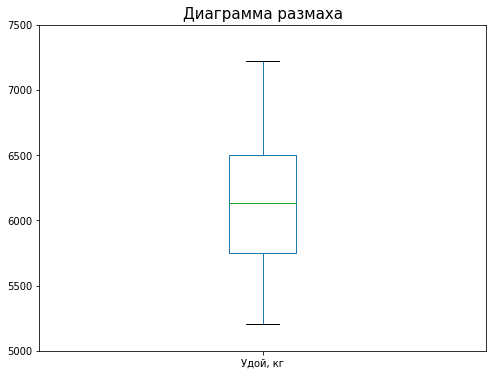

In [23]:
ax = ferma_main['Удой, кг'].plot.box(figsize=(8,6))
plt.title('Диаграмма размаха', fontsize=15)
plt.ylim(5000, 7500)
plt.show()

In [24]:
ferma_main[ferma_main['Удой, кг']>7300]

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
16  17     45616                                   11.5              1675   

    СПО (Сахаро-протеиновое соотношение)          Порода Тип пастбища  \
16                                  0.93  Вис Бик Айдиал    Холмистое   

   порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
16           Айдиал        3.22    3.076      вкусно  более_2_лет

Жирность молока данной коровы ниже средней по стаду и минимальной по выборке коров. Поскольку реальный удой неизвестен, предлагаю просто исключить данную корову из списка.

In [25]:
ferma_main = ferma_main.loc[ferma_main['Удой, кг']<7300]

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:





- Найден выброс


    

Построим графики, которые описывают количественным признаки. 

In [26]:
num_col_names = ['Удой, кг',
                'ЭКЕ (Энергетическая кормовая единица)',
                'Сырой протеин, г',
                'СПО (Сахаро-протеиновое соотношение)',
                'Жирность,%',
                'Белок,%']

In [27]:
#for name in num_col_names:
#    ferma.plot(kind='hist', bins=10, y=name, figsize=(18,5), grid = True)
#    plt.title(name)

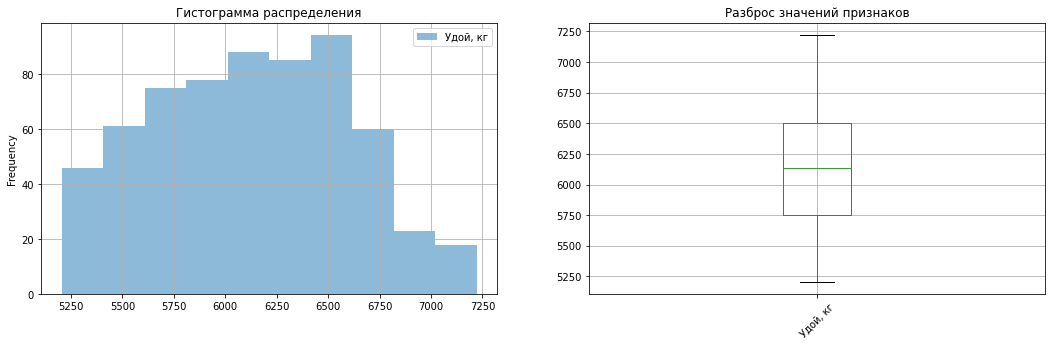

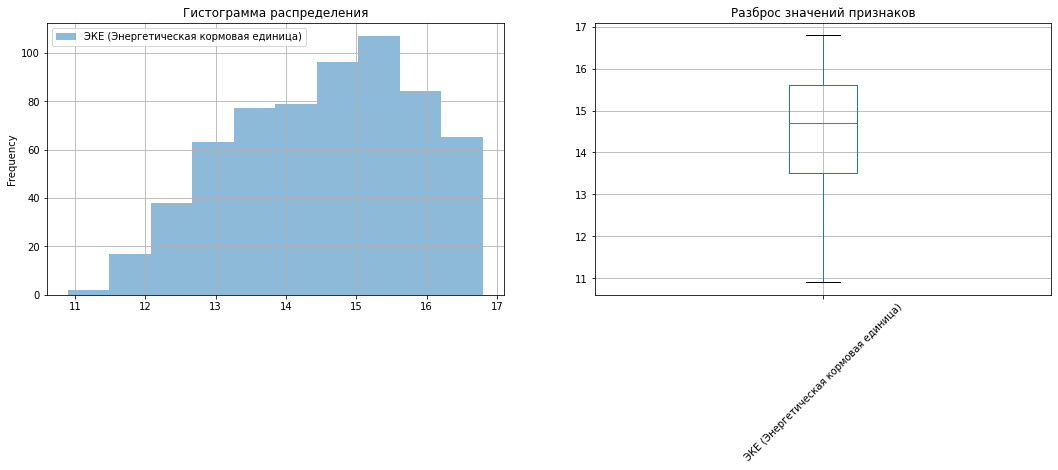

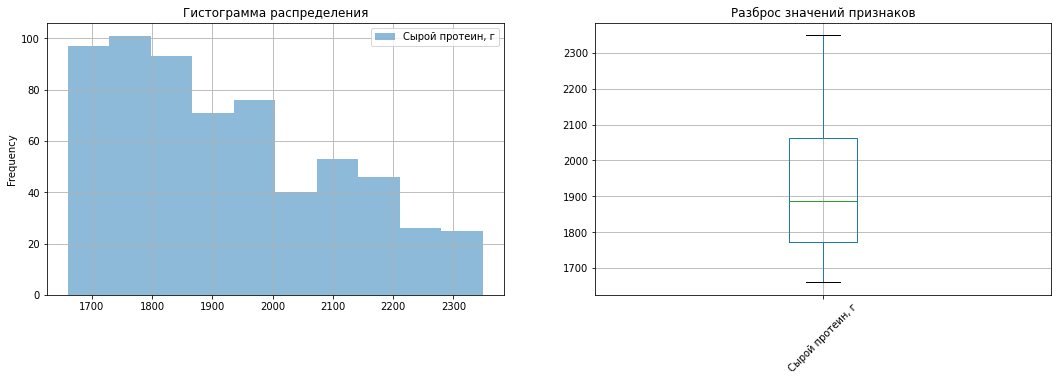

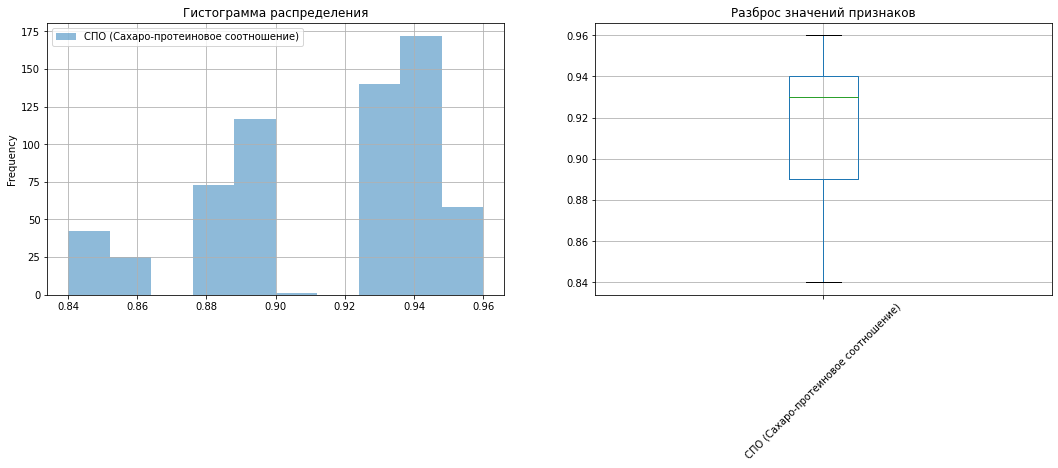

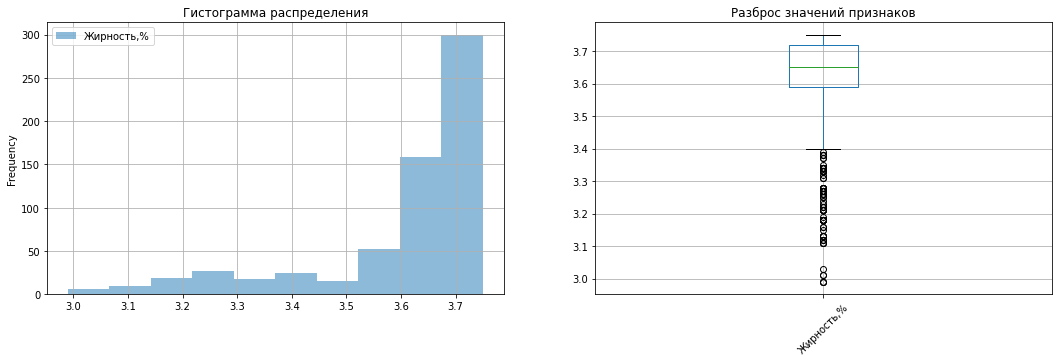

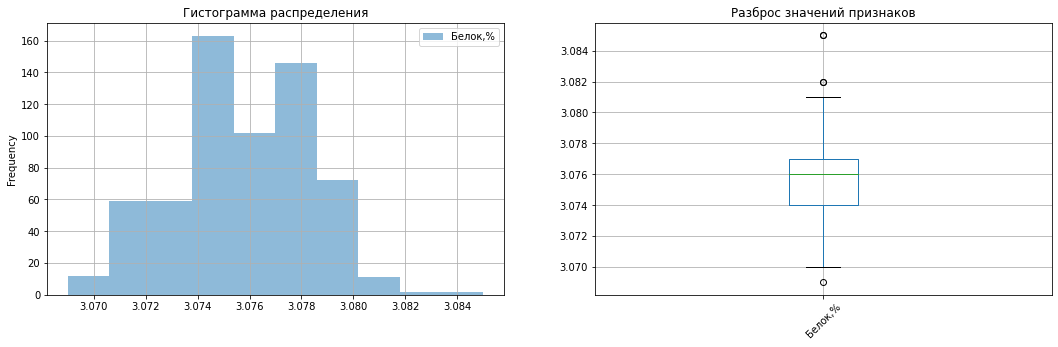

In [28]:
for name in num_col_names:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ferma_main.plot(kind='hist', bins=10, y=name, figsize=(18,5), grid = True, alpha=0.5, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    ferma_main.plot(kind='box', y=name, figsize=(18,5), ax=axes[1], grid = True, rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Прекрасно, неплохо всё оформлено.  Здорово что использовала subplots




</div>




<div class="alert alert-danger">
<font size="5">
<b>Комментарий ревьюера</b></font>





Ошибка ❌:

Использование как гистограммы, так и ящика с усами в анализе колличественных данных предпочтительно, потому что каждый из них обладает своими уникальными преимуществами:

Гистограмма: Гистограмма позволяет вам визуально оценить форму распределения данных. Она особенно полезна для выявления бимодальности - наличия двух характерных мод в данных. Гистограмма позволяет увидеть, есть ли две выраженные вершины (пики) в данных, что может указывать на наличие двух различных групп в данных.

Ящик с усами (Boxplot): Ящик с усами отлично подходит для выявления выбросов и оценки разброса данных. Он обнаруживает асимметрии и позволяет оценить наличие выбросов, которые не всегда легко заметить на гистограмме.

Путем комбинирования информации от обоих видов графиков, вы получаете более полное представление о данных. Гистограмма помогает выявить бимодальность или необычные формы распределения, в то время как ящик с усами позволяет выделить потенциальные аномалии и выбросы. Вместе они обеспечивают более глубокое понимание структуры данных, помогая выявить как общие паттерны, так и аномалии в распределении данных.




<div class="alert alert-warning">


Совет 🤔:



для красоты восприятия рекомендую использовать [subplots](https://pyprog.pro/mpl/mpl_main_components.html):  Для каждого признака, в одном столбце график - гистограмма, в другом график - boxplot


Поскольку гисторамма СПО показывает явных 3 пика, переведем эти данные в категориальные, но сначала проверим какие показатели влияют на вкус молока.

Есть выбросы в данных о жирности, гистограмма не показывает нормальное распределение. Из интернета: в зависимости от породы, кормов, режима содержания и просто индивидуальных особенностей коровы натуральное цельное молоко может иметь жирность от 3,2 до 5,5.

In [29]:
ferma_main['Жирность,%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: Жирность,%, dtype: float64

In [30]:
f'Количество коров с низкой жирностью молока - {ferma_main.loc[ferma_main["Жирность,%"]<3.2].shape[0]} голов'

'Количество коров с низкой жирностью молока - 29 голов'

Количество выбросов менее 5%, полагаю ими можно пренебречь.

В данных по белку также есть выбросы.

In [31]:
ferma_main['Белок,%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: Белок,%, dtype: float64

Максимальное и минимальное значение не сильно отличаются от среднего значение, поэтому будем считать эти отклонения в пределах нормы. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Хорошее наблюдение.  Можно попробовать перевести в категориальный


In [32]:
ferma_main.pivot_table(columns='Тип пастбища', index = 'Вкус молока', aggfunc = {'id': 'count',
                                                                            'ЭКЕ (Энергетическая кормовая единица)':'mean',
                                                                            'Сырой протеин, г': 'mean',
                                                                            'СПО (Сахаро-протеиновое соотношение)': 'mean'})

id           СПО (Сахаро-протеиновое соотношение)  \
Тип пастбища Равнинное Холмистое                            Равнинное   
Вкус молока                                                             
вкусно             136       234                             0.917794   
не вкусно          142       116                             0.904296   

                       Сырой протеин, г               \
Тип пастбища Холмистое        Равнинное    Холмистое   
Вкус молока                                            
вкусно        0.918397      1905.029412  1970.491453   
не вкусно     0.907629      1913.626761  1863.853448   

             ЭКЕ (Энергетическая кормовая единица)             
Тип пастбища                             Равнинное  Холмистое  
Вкус молока                                                    
вкусно                                   14.701471  14.828205  
не вкусно                                14.122535  14.327586

Не вкусным молоко бывает чаще при выпасе на равнинах и при низком содержании в корме СПО и ЭКЕ.

In [33]:
ferma_main['СПО']  = ferma_main['СПО (Сахаро-протеиновое соотношение)']\
.apply(lambda x: 0 if x<0.87 else 1 if x>0.87 and x<0.92 else 2)

Построим графики, которые описывают категориальные признаки. 

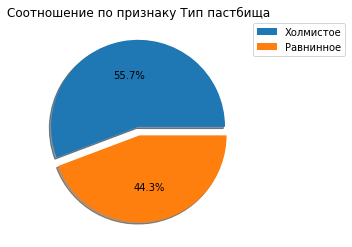

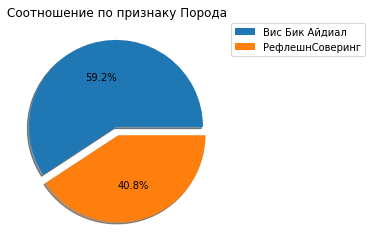

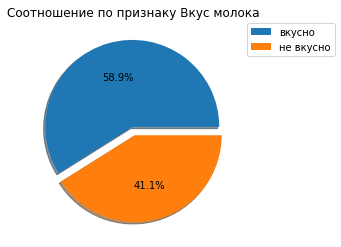

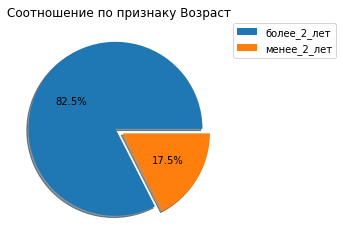

In [34]:
# Решила все собрать в одну функцию
cat_names_for_pie = ['Тип пастбища', 
                     'Порода',  
                     'Вкус молока', 
                     'Возраст']
for name in cat_names_for_pie:
    ferma_main[name].value_counts().plot(kind='pie', y='Тип пастбища', autopct='%1.1f%%', 
                shadow=True, explode=[0.05, 0.05], 
                legend=True, title=f'Соотношение по признаку {name}', ylabel='', labeldistance=None)
    plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.show()  

Таргет Вкус молока, а так же признаки Тип пастбища и Порода сбалансированы, соотношение составляет 45/55 и 40/60.  
Признак Возраст менее сбалансирован, т.к. соотношение 17.5/82.5 - но такое соотношение вполне логично, так как коровы в среднем в хозяйствах содержатся 5-8 лет.  

Коровы в возрате менее 2х лет я бы удалила из датафрейма, но боюсь, что данных останется мало для обучения модели Поскольку в таком возрасте физиологически не дают еще молока, данные графы Удой для коров в возрасте до 2х лет это случай, когда продавец "приукрасил" товар.

In [35]:
#pasture_proportion = ferma_main['Тип пастбища'].value_counts()

#ax = pasture_proportion.plot(kind='pie', y='Тип пастбища', autopct='%1.1f%%', 
            #shadow=True, explode=[0.05, 0.05], 
                #legend=True, title='Соотношение по типу пастбищ', ylabel='', labeldistance=None)
#ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.show()

In [36]:
#breed_proportion = ferma_main['Порода'].value_counts()

#ax = breed_proportion.plot(kind='pie', y='Порода', autopct='%1.1f%%', 
#                shadow=True, explode=[0.05, 0.05], 
        #legend=True, title='Соотношение по породе', ylabel='', labeldistance=None)
#ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.show()

In [37]:
#age_proportion = ferma_main['Возраст'].value_counts()

#ax = age_proportion.plot(kind='pie', y='Возраст', autopct='%1.1f%%', 
                #shadow=True, explode=[0.05, 0.05], 
                #legend=True, title='Соотношение по возрасту', ylabel='', labeldistance=None)
#ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.show()

In [38]:
#taste_proportion = ferma_main['Вкус молока'].value_counts()

#ax = taste_proportion.plot(kind='pie', y='Вкус молока', autopct='%1.1f%%', 
#                shadow=True, explode=[0.05, 0.05], 
#                legend=True, title='Соотношение по вкусу', ylabel='', labeldistance=None)
#ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.show()



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Правильно что строишь разные типы графиков для разных типов данных.  Отличные графики и оформлены хорошо. Но для удобства восприятия можно оформить в subplots

In [39]:
cow_buy.describe()

Текущая_жирность,%  Текущий_уровень_белок,%
count           20.000000                20.000000
mean             3.577500                 3.069500
std              0.126818                 0.010339
min              3.340000                 3.046000
25%              3.510000                 3.064000
50%              3.590000                 3.074000
75%              3.650000                 3.076000
max              3.770000                 3.081000

Средний показатель жирности и белка у коров из списка к покупке ниже, чем в среднем по стаду. 

## Корреляционный анализ

Для модели линейной регрессии линейная зависимость между целевыми и входными признаками обязательна, иначе предсказания будут ошибочными. Построем матрицу корреляции для всего датасета. 

In [40]:
#ferma_main.corr()

In [41]:
ferma_main.phik_matrix() 

interval columns not set, guessing: ['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%', 'СПО']


id  Удой, кг  \
id                                     1.000000  0.000000   
Удой, кг                               0.000000  1.000000   
ЭКЕ (Энергетическая кормовая единица)  0.000000  0.719239   
Сырой протеин, г                       0.108271  0.465118   
СПО (Сахаро-протеиновое соотношение)   0.382303  0.661615   
Порода                                 0.611843  0.161643   
Тип пастбища                           0.037776  0.279645   
порода папы_быка                       0.320977  0.518114   
Жирность,%                             0.519949  0.706516   
Белок,%                                0.000000  0.063045   
Вкус молока                            0.039659  0.178281   
Возраст                                0.000000  0.998071   
СПО                                    0.289070  0.814552   

                                       ЭКЕ (Энергетическая кормовая единица)  \
id                                                                  0.000000   
Удой, кг                                                            0.719239   
ЭКЕ (Энергетическая кормовая единица)                               1.000000   
Сырой протеин, г                                                    0.458283   
СПО (Сахаро-протеиновое соотношение)                                0.591190   
Порода                                                              0.123086   
Тип пастбища                                                        0.106758   
порода папы_быка                                                    0.171355   
Жирность,%                                                          0.715914   
Белок,%                                                             0.000000   
Вкус молока                                                         0.272265   
Возраст                                                             0.771596   
СПО                                                                 0.699227   

                                       Сырой протеин, г  \
id                                             0.108271   
Удой, кг                                       0.465118   
ЭКЕ (Энергетическая кормовая единица)          0.458283   
Сырой протеин, г                               1.000000   
СПО (Сахаро-протеиновое соотношение)           0.386550   
Порода                                         0.090971   
Тип пастбища                                   0.097165   
порода папы_быка                               0.000000   
Жирность,%                                     0.397691   
Белок,%                                        0.202386   
Вкус молока                                    0.173817   
Возраст                                        0.353829   
СПО                                            0.442350   

                                       СПО (Сахаро-протеиновое соотношение)  \
id                                                                 0.382303   
Удой, кг                                                           0.661615   
ЭКЕ (Энергетическая кормовая единица)                              0.591190   
Сырой протеин, г                                                   0.386550   
СПО (Сахаро-протеиновое соотношение)                               1.000000   
Порода                                                             0.062660   
Тип пастбища                                                       0.155349   
порода папы_быка                                                   0.425601   
Жирность,%                                                         0.645581   
Белок,%                                                            0.073787   
Вкус молока                                                        0.572702   
Возраст                                                            0.744410   
СПО                                                                1.000000   

                                         Порода  Тип пастбища  \
id                                     0.611843      0.037776   
Удой,

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 phik




</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



- коэффициент корреляции Пирсона использован для ненормально распределённых данных. этот коэффициент чувствителен к отклонениям от нормальности, что может исказить результаты анализа. В случае ненормальности распределения? используем коэффициент Спирмана
    
    

<div class="alert alert-warning">


Совет: 



- в то время как расчёт корреляции Пирсона имеет множество ограничений,  есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация. Может быть полезно в будущем
    

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Уже вторая твоя ссылка не открывается 🤷🏻‍♀️
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Открывается с VPN


<AxesSubplot:xlabel='Удой, кг', ylabel='ЭКЕ (Энергетическая кормовая единица)'>

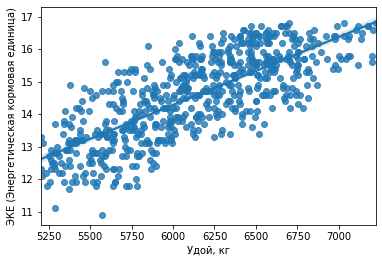

In [42]:
sns.regplot(data=ferma_main, x="Удой, кг", y='ЭКЕ (Энергетическая кормовая единица)')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Теперь Логично: Сначала мы смотрим на зависимость удоя и ЭКЭ, видим что она нелинейная, и видим что удой и ЭКО в квадрате имеет линейную связь


<AxesSubplot:xlabel='Удой, кг', ylabel='ЭКЕ^2'>

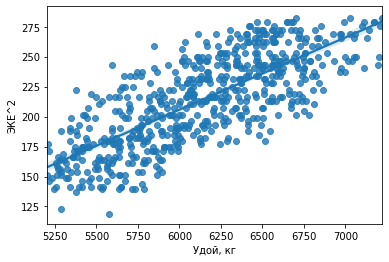

In [43]:
ferma_main['ЭКЕ^2']=ferma_main['ЭКЕ (Энергетическая кормовая единица)']**2
sns.regplot(data=ferma_main, x="Удой, кг", y='ЭКЕ^2')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Перед тем как строить regplot для эко^2, строим для эко, и вот именно там и делаем вывод о нелинейности связи (И тогда дополнительно можно построить график для эко^2, чтобы убедиться что в этом случаи имеет смысл для линейной регрессии использовать эко в квадрате) 

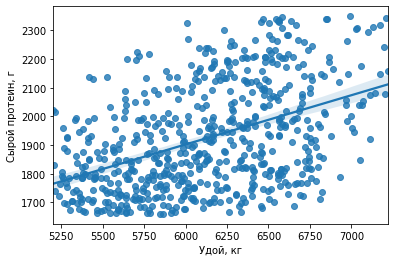

In [44]:
sns.regplot(data=ferma_main, x="Удой, кг", y='Сырой протеин, г')
plt.show()

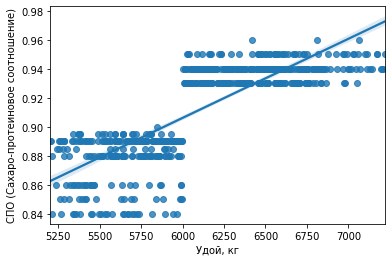

In [45]:
sns.regplot(data=ferma_main, x="Удой, кг", y='СПО (Сахаро-протеиновое соотношение)')
plt.show()

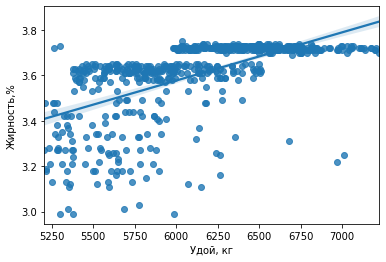

In [46]:
sns.regplot(data=ferma_main, x="Удой, кг", y='Жирность,%')
plt.show()

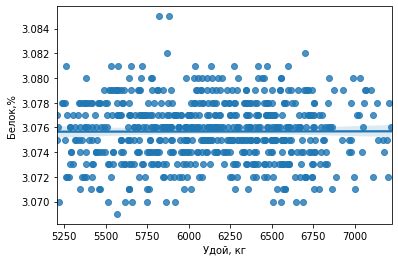

In [47]:
sns.regplot(data=ferma_main, x="Удой, кг", y='Белок,%')
plt.show()


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 



    
- попробуй построить scater_plot между удоем и количественными признаками с учётом категориальных переменных: порода, тип_пастбища, порода_папы_быка, вкус молока. Будь у нас нейросетка, в таком роде анализе может быть и не было бы нужды, но для линейных моделей это хороший вариант чтобы получить дополнительную информацию, и даже построить на основе этого новые признаки

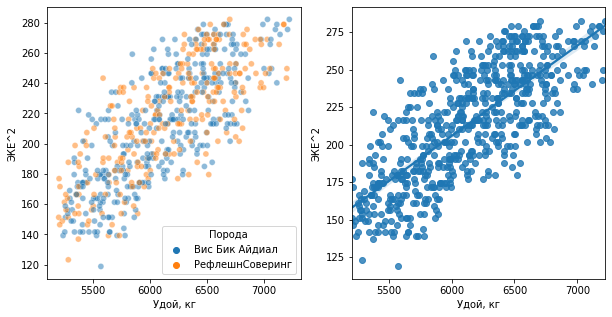

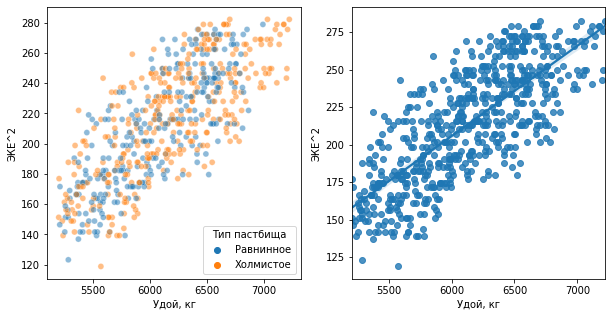

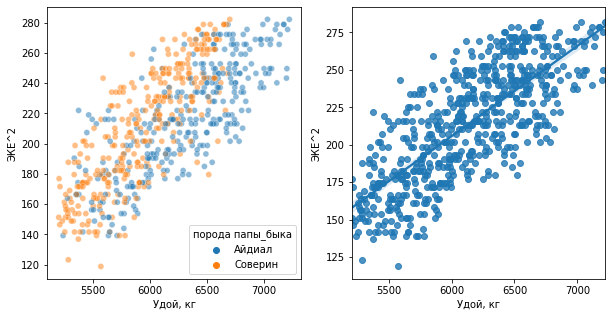

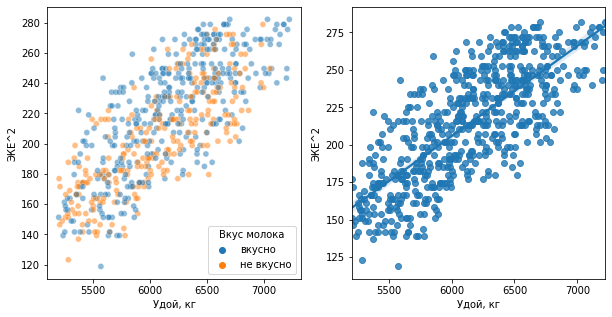

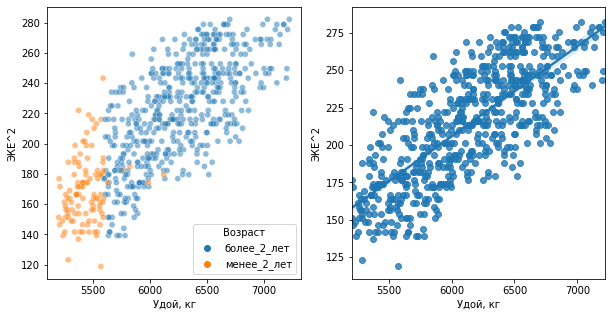

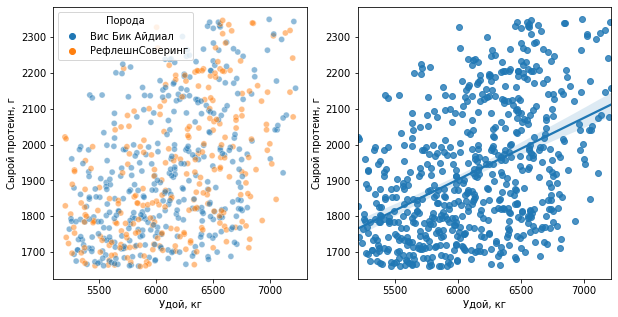

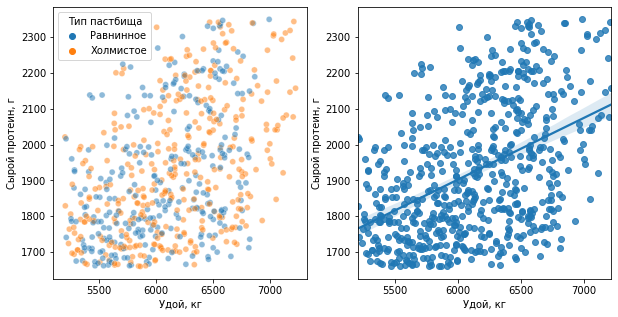

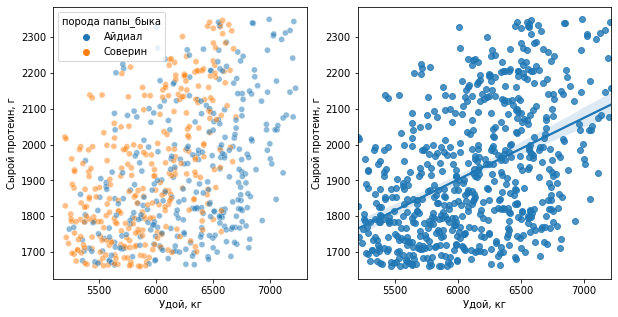

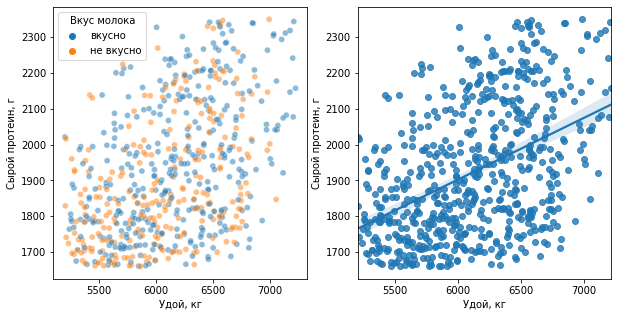

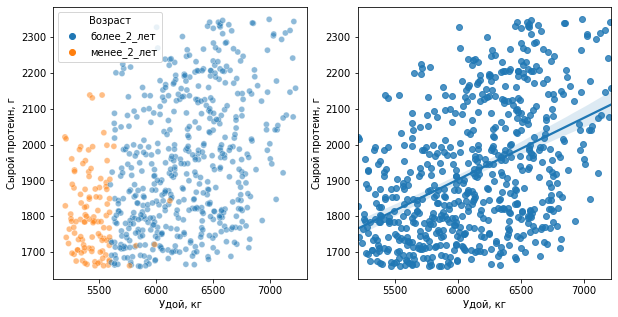

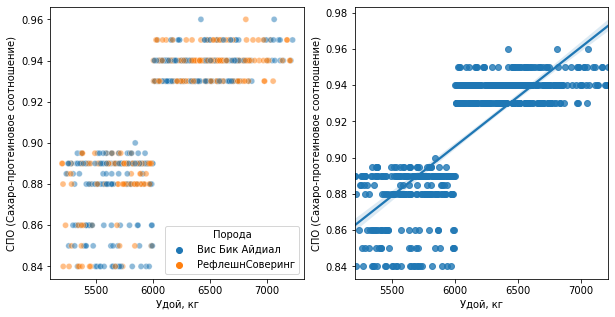

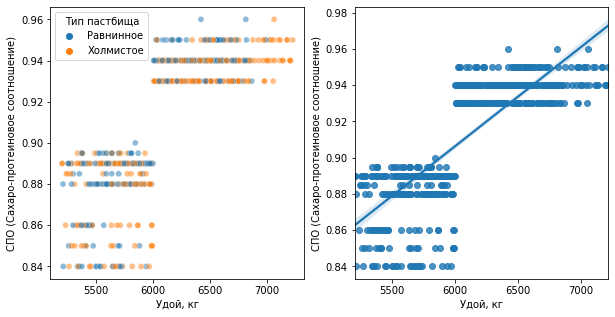

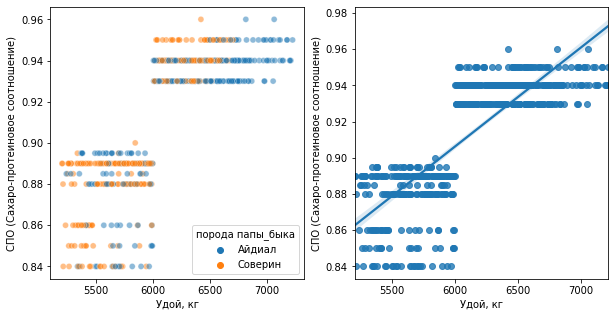

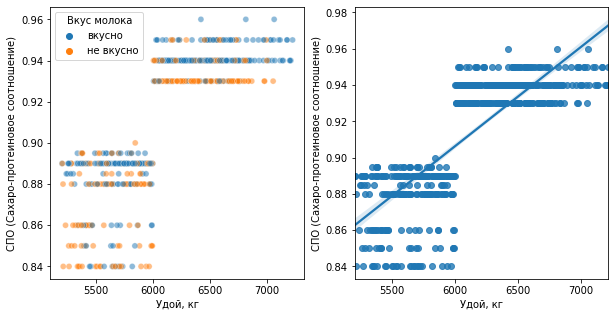

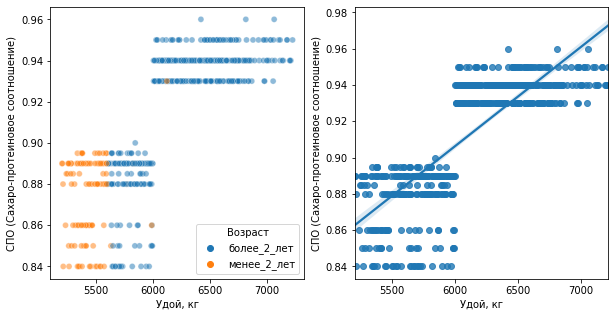

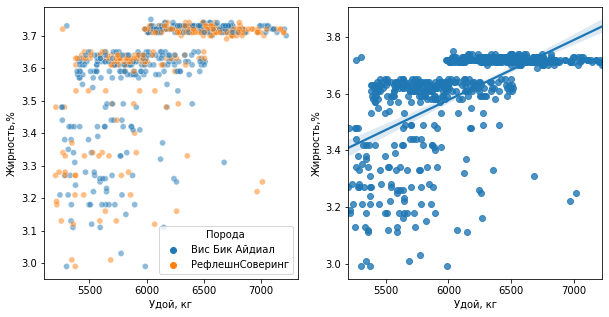

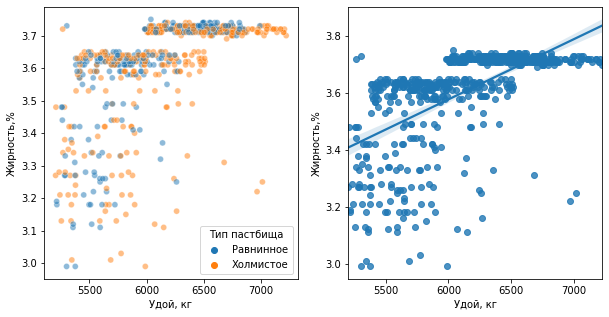

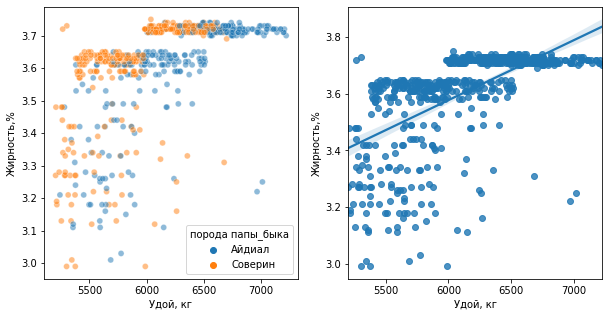

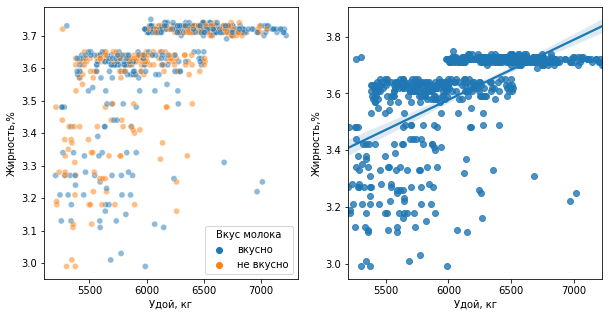

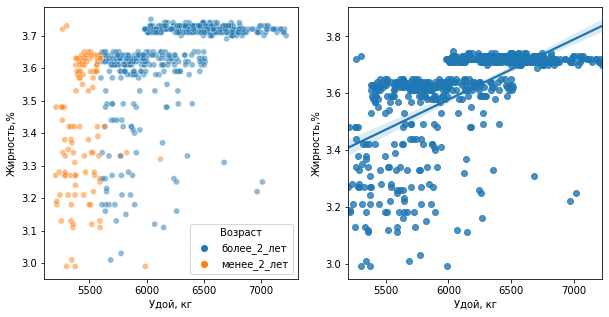

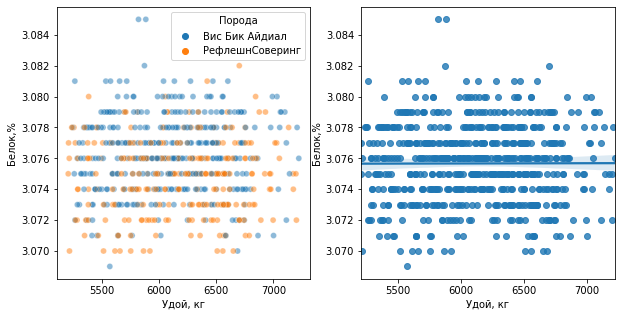

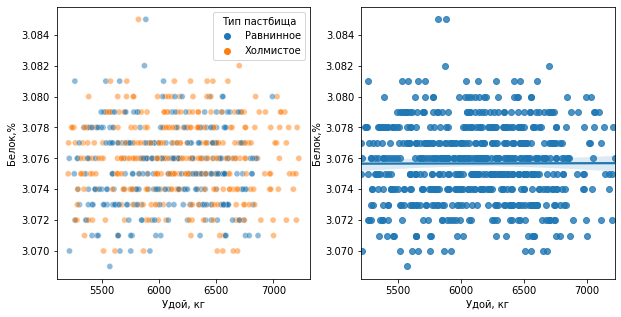

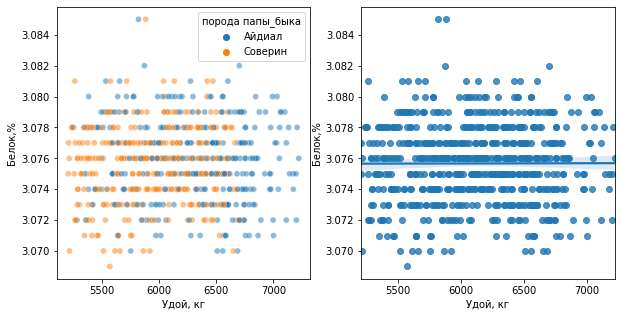

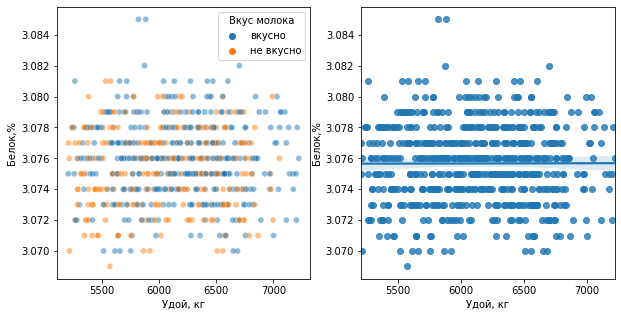

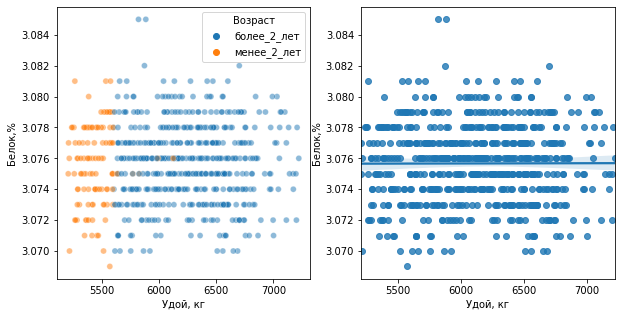

In [48]:
for name in ['ЭКЕ^2',
                'Сырой протеин, г',
                'СПО (Сахаро-протеиновое соотношение)',
                'Жирность,%',
                'Белок,%']:
    for cat in ['Порода', 
                 'Тип пастбища', 
                 'порода папы_быка', 
                 'Вкус молока', 
                 'Возраст']:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
        sns.scatterplot(data=ferma_main, x="Удой, кг", y=name, hue=cat, alpha=0.5, ax=axes[0]) 
        sns.regplot(data=ferma_main, x="Удой, кг", y=name)
        plt.show()

Чем выше показатели корма (Эке, СПО, Сырой протеин), тем коровы c породой папы Айдиал дают и при этом старше 2х лет больше молока. По жирности получились странные результаты: обычно чем выше удой, тем нижу жирность молока (обраная завиимость), а тут наоборот. Опять жирность меня смущает.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


здорово что заметила дополнительные связи в разбивке по категориальным признакам. Действительно получается что если коровы молодые, то лучше кормёжка не увеличивает удои.
    
    
    
По поводу жирности - мы предполагаем что жирность это характеристика качества молока, который на удой никак не влияет. При желании можно увидеть что угодно, но скорее всего это случайность    

Чтобы было проще работать с матрицами корреляции, полезно строить тепловые карты.

<AxesSubplot:>

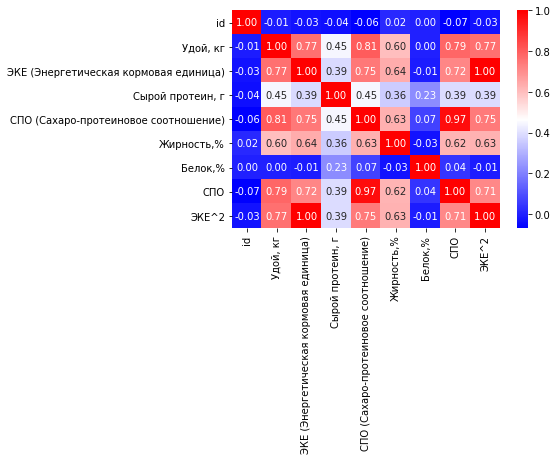

In [49]:
sns.heatmap(ferma_main.corr(), annot=True, fmt='.2f', cmap='bwr') 

Ярко краные тона говорят о сильной линейной зависимости, а синие — о слабой. Судя по тепловой карте и диаграммам разброса, высокая прямая связь целевого признака Удой и входных признаков ЭКЕ и СПО, заметная связь между Удоем и Жирностью, а между Удоем и Сырым протеином связь умеренная.


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 




- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет


    
- если хочешь характеризовать силу корреляционной связи Воспользуйся    

![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)


"Усреднённое, заметная" - это что то неопнтяное



## Обучение модели линейной регрессии

Из всего набора факторов выберим признаки, которые подходят для модели. Очевидно, что характеристики молока не влияют на удой, в отличие от параметров корма. 

Для того, чтобы обучить модель линейной регрессии на подходящих данных и получить предсказания целевого признака убрем из таблицы все признаки не влияющие на таргет.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    Для того, чтобы обучить модель линейной регрессии на подходящих данных и получить предсказания целевого признака убрем из таблицы все категориальные признаки.

    
Зачем убирать категориальные признаки? Тут Видимо у тебя какая-то неточная формулировка, потому что ниже ты отлично используешь категориальные признаки для линейных моделей ✅

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





По поводу аргументации удаления - белок и жирность мы убираем потому что это характеристики качество молока, который по идее никак не влияют на удои. СПО (Сахаро-протеиновое соотношение) - убираем потому что у тебя это теперь категориальный признак
    
    
    
    коэффициента корреляции прямой связи ниже 0,5
    
    
А если коэффициент корреляции -0,99, его тоже надо убирать?! Откуда вообще взялся 0,5?    
    

### Модель 1

In [50]:
linear_ferma = ferma_main.drop(['id',
                           'Жирность,%', 
                           'Белок,%', 
                           'Вкус молока',
                            'СПО', 
                            'ЭКЕ^2'], axis =1)
linear_ferma.head()

Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      5863                                   14.2              1743   
1      5529                                   12.8              2138   
2      5810                                   14.0              1854   
3      5895                                   12.4              2012   
4      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  порода папы_быка      Возраст  
0           Айдиал  более_2_лет  
1          Соверин  менее_2_лет  
2          Соверин  более_2_лет  
3           Айдиал  более_2_лет  
4          Соверин  менее_2_лет

Все разношёрстные признаки нужно подготовить:
- кодировать категориальные признаки,
- масштабировать количественные признаки.

После подготовки данных построим гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности масштабирования.

In [51]:
RANDOM_STATE = 42

In [52]:
# разбиваем признаки на входные и целевой
X1 = linear_ferma.drop(columns=['Удой, кг'])
y1 = linear_ferma['Удой, кг']

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    train_size=0.67, 
                                                    random_state=RANDOM_STATE,
                                                   )

In [54]:
l_cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']
l_num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно, для первой модели используем именно эти признаки

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Мы проводим улучшение модели в два этапа
    
    
1. В первый раз используем только данные из   ferma_main
    
    
2. Улучшаем данные за счёт учёта нелинейности в эко и спо
    
    
3. Улучшаем модель за счёт учёта данных из   ferma_dad  

Масштабирование признаков

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train1[l_num_col_names])
X_test_scaled = scaler.transform(X_test1[l_num_col_names])

Кодирование признаков

In [57]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [58]:
X_train_ohe = encoder.fit_transform(X_train1[l_cat_col_names]) 
X_test_ohe = encoder.transform(X_test1[l_cat_col_names]) 

In [59]:
encoder_col_names = encoder.get_feature_names()

In [60]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=l_num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=l_num_col_names)

In [62]:
X_train1 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test1 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [63]:
X_train1.sample()

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет  \
133                 1.0           1.0         1.0             0.0   

     ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
133                               1.024309         -0.040037   

     СПО (Сахаро-протеиновое соотношение)  
133                               0.82698


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



OHE и Scaler применены без утечки данных



<div class="alert alert-warning">



Совет: 



- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Почему  srtatify не работает? Выборка маленькая? но в примерах по ссылке еще меньше. 1 member - это что? один столбец Удой? или строк недотаточно?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Извиняюсь, stratify cтоит применить при сплите для задачи логистической регрессии (где у нас таргет категориальный - 0 или 1), а тут ведь у нас тarget количественный - удой, тут стратификацию не сделать, потому что слишком много уникальных значений у удоя. 


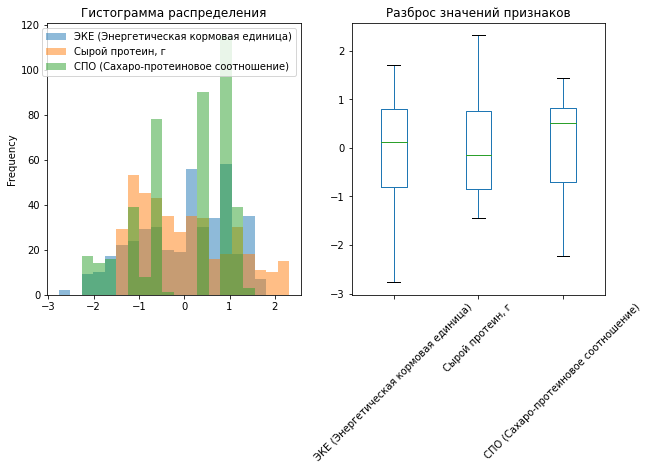

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train1[l_num_col_names].plot(kind='hist', bins=20, alpha=0.5, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train1[l_num_col_names].plot(kind='box',  ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [65]:
# инициализация модели
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train1, y_train1) 

# предсказанные значения для X_test
predictions1 = model_lr.predict(X_test1)

# вывод вторых предсказанного и настоящего значений
pd.DataFrame({'Предсказание':[int(predictions1[1])], 'Известное значение':[y_test1.reset_index(drop=True)[1]]})

Предсказание  Известное значение
0          6425                6512

Предсказания очень близки к известным знечениям.

Построем частотную гистограмму распределения и ящик с усами, чтобы проанализировать целевой признак.

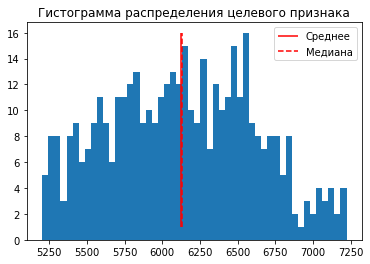

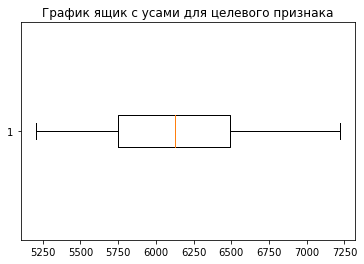

In [66]:
bins = plt.hist(y_train1, bins=50)
plt.vlines(x=y_train1.mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=y_train1.median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения целевого признака')
plt.legend()
plt.show()

plt.title('График ящик с усами для целевого признака')
plt.boxplot(y_train1, vert=False) 
plt.show()

In [67]:
def metrics (y, p):
    rmse = mean_squared_error(y, p, squared=False) 
    mae = mean_absolute_error(y, p)
    r2 = r2_score(y, p)
    mse = mean_squared_error(y, p) 
    return pd.DataFrame({'MSE':[f'{mse:.0f}'], 'RMSE': [f'{rmse:.0f}'], 'MAE': [f'{mae:.0f}'], 'R2':[f'{r2:.3f}']})

Расчитаем метрики первой модели:

In [68]:
m1 = metrics(y_test1, predictions1)
m1

MSE RMSE  MAE     R2
0  42416  206  163  0.793

MSE - показывает, на какое значение в среднем предсказание отличается от истинного значения. Измеряется в квадратных единицах целевого признака, из-за этого её сложно интерпретировать.

MAE  - показывает, что модель в среднем ошибается на 163 кг

Чем ближе к единице значение R2, тем точнее предсказывает модель.  Модель смогла объяснить 79% вариации, постараемся улучшить модель.

Проведем анализ остатков первой модели с помощью графиков

In [69]:
def residuals(y, p):
    r=y-p
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(r)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(p, r)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

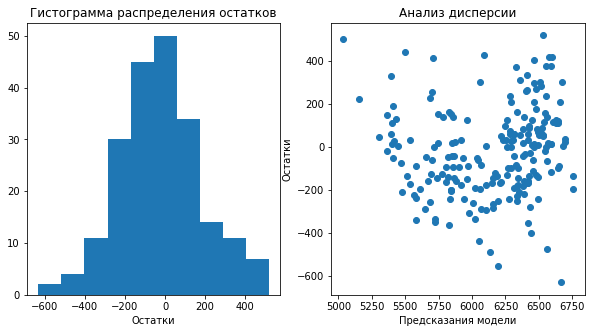

In [70]:
residuals(y_test1, predictions1)

Гистограмма распределения остатков первой модели показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях.На диаграмме рассеивания виден небольшое увеличение разброса, но в целом дисперсия близка к постоянной. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:





Анна, по-прежнему не вижу ни одной функции.  Это не блажь, это как раз и предлагается чтобы облегчить работу студента.  Предлагаю создать функцию которая подсчитает 4 метрики, и выведет их  занчения. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Функция def metrics отличная, сразу видно все преимущества её использования






<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

    Пока модель ошибается в 20%. постараемся улучшить модель.
    
    
Не совсем точная трактовка метрики.  Обычно пишут что "Модель смогла объяснить 79% вариации". А то что ты написала, больше характеризует Метрика для задач классификации - accuracy   
Мне кажется проще всего понять что такое коэффициент терминации начав рассмотрение парной регрессии (y = ax+b), потому что там коэффициент детерминации это квадрат от коеффиента а (он же коеффииент корреляции, он же то то характеризует наклон). Вот тут именно эта логика обьяснения и дана:
https://stat4stud.narod.ru/stat_part2.pdf



 ###  Модель 2

ЭКЕ и Удой связаны нелинейно. Исключим нелинейность: введем признак «ЭКЕ в квадрате».

In [71]:
linear_ferma['ЭКЕ^2']=ferma_main['ЭКЕ^2']

СПО переведем в категориальный признак.

In [72]:
linear_ferma['СПО']=linear_ferma['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 0 if x<0.87 else 1 if x>0.87 and x<0.92 else 2)

In [73]:
linear_ferma = linear_ferma.drop(['СПО (Сахаро-протеиновое соотношение)'], axis =1)
linear_ferma.sample(5)

Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
220      5322                                   12.5              1735   
95       6976                                   16.4              2263   
143      5976                                   13.7              1795   
46       7173                                   16.7              2146   
403      5262                                   12.6              1786   

              Порода Тип пастбища порода папы_быка      Возраст   ЭКЕ^2  СПО  
220   Вис Бик Айдиал    Холмистое          Соверин  менее_2_лет  156.25    0  
95    Вис Бик Айдиал    Холмистое           Айдиал  более_2_лет  268.96    2  
143   Вис Бик Айдиал    Равнинное          Соверин  более_2_лет  187.69    1  
46   РефлешнСоверинг    Холмистое           Айдиал  более_2_лет  278.89    2  
403   Вис Бик Айдиал    Равнинное          Соверин  менее_2_лет  158.76    1

Повторим все этапы

In [74]:
# разбиваем признаки на входные и целевой
X2 = linear_ferma.drop(columns=['Удой, кг'])
y2 = linear_ferma['Удой, кг']

In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2, 
    random_state=RANDOM_STATE
) 

Масштабирование и кодирование признаков после изменений в таблице.

In [76]:
l_cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст','СПО']
l_num_col_names = ['ЭКЕ^2', 'Сырой протеин, г']

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>


Ошибка:


А почему ты отказываешься от эке? Он может быть полезным,  лучше попробовать добавить новые сгенерированные признаки, а не заменить


In [77]:
X_train_scaled = scaler.fit_transform(X_train2[l_num_col_names])
X_test_scaled = scaler.transform(X_test2[l_num_col_names])

In [78]:
X_train_ohe = encoder.fit_transform(X_train2[l_cat_col_names]) 
X_test_ohe = encoder.transform(X_test2[l_cat_col_names]) 

In [79]:
encoder_col_names = encoder.get_feature_names()

In [80]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=l_num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=l_num_col_names)

In [82]:
X_train2 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test2 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [83]:
X_train2.sample(5)

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет  x4_1  x4_2  \
94                  0.0           0.0         1.0             0.0   0.0   1.0   
298                 0.0           1.0         0.0             0.0   0.0   1.0   
444                 0.0           0.0         1.0             0.0   0.0   1.0   
125                 1.0           0.0         1.0             0.0   1.0   0.0   
361                 0.0           0.0         0.0             0.0   0.0   1.0   

        ЭКЕ^2  Сырой протеин, г  
94   0.082269          1.259534  
298  0.004235          1.412271  
444  1.060226          1.139527  
125 -0.746810          0.288565  
361  1.577968         -1.298807

In [84]:
# инициализация модели
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train2, y_train2) 

# предсказанные значения для X_test
predictions2 = model_lr.predict(X_test2)

# вывод вторых предсказанного и настоящего значений
pd.DataFrame({'Предсказание':[int(predictions2[1])], 'Известное значение':[y_test2.reset_index(drop=True)[1]]})

Предсказание  Известное значение
0          6469                6512

 Разница между предсказанием и фактом уменьшилась.

Расчитаем второй первой модели:

In [85]:
m2 = metrics(y_test2, predictions2)
m2

MSE RMSE  MAE     R2
0  37285  193  149  0.817

Расчитаем метрики первой модели:

Качество модели улучшилось: МАЕ уменьшилось до 149 кг, а R2 выросло на 2,4%. Улучшим модаль за счет данных ferma_dad

In [86]:
#mse = mean_squared_error(y_test, predictions) 
#f'MSE = {mse:.0f}'

In [87]:
#rmse = mean_squared_error(y_test, predictions, squared=False) 
#f'RMSE = {rmse:.0f}'

In [88]:
#mae = mean_absolute_error(y_test, predictions)
#f'MAE = {mae:.0f}'

In [89]:
#r2 = r2_score(y_test, predictions)
#f'R2 = {r2:.3f}'

Проведем анализ остатков второй модели с помощью графиков

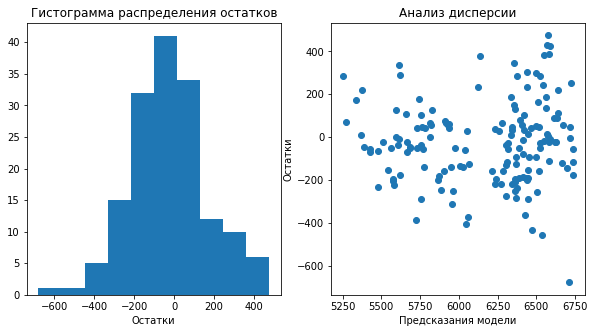

In [90]:
residuals(y_test2, predictions2)

Гистограмма распределения остатков второй модели также показывает равномерное распределение. 

### Модель 3

Дополным данными об отце по каждой корове соединив 2 таблицы

In [91]:
linear_ferma_1 = ferma_main.merge(ferma_dad).drop(['id',
                   'Жирность,%', 
                   'Белок,%', 
                   'Вкус молока',
                   'ЭКЕ (Энергетическая кормовая единица)',
                   'СПО (Сахаро-протеиновое соотношение)'], axis =1)
linear_ferma_1.sample(5)

Удой, кг  Сырой протеин, г           Порода Тип пастбища  \
568      6819              2149  РефлешнСоверинг    Равнинное   
335      5513              1744  РефлешнСоверинг    Холмистое   
94       6976              2263   Вис Бик Айдиал    Холмистое   
188      6524              1880   Вис Бик Айдиал    Холмистое   
18       5698              1759  РефлешнСоверинг    Холмистое   

    порода папы_быка      Возраст  СПО   ЭКЕ^2 Имя Папы  
568           Айдиал  более_2_лет    2  272.25   Буйный  
335          Соверин  менее_2_лет    1  210.25    Барин  
94            Айдиал  более_2_лет    2  268.96   Буйный  
188          Соверин  более_2_лет    2  262.44    Барин  
18           Соверин  более_2_лет    1  204.49    Барин

Повторим все этапы еще раз

In [92]:
# разбиваем признаки на входные и целевой
X3 = linear_ferma_1.drop(columns=['Удой, кг'])
y3 = linear_ferma_1['Удой, кг']

In [93]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, 
    y3, 
    random_state=RANDOM_STATE,
    #stratify=y
) 

Масштабирование и кодирование признаков после изменений в таблице.

In [94]:
l_cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст','СПО', 'Имя Папы']
l_num_col_names = ['ЭКЕ^2', 'Сырой протеин, г']

In [95]:
X_train_scaled = scaler.fit_transform(X_train3[l_num_col_names])
X_test_scaled = scaler.transform(X_test3[l_num_col_names])

In [96]:
X_train_ohe = encoder.fit_transform(X_train3[l_cat_col_names]) 
X_test_ohe = encoder.transform(X_test3[l_cat_col_names]) 

In [97]:
encoder_col_names = encoder.get_feature_names()

In [98]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [99]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=l_num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=l_num_col_names)

In [100]:
X_train3 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test3 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [101]:
X_train3.sample(5)

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет  x4_1  x4_2  \
215                 1.0           1.0         1.0             0.0   0.0   1.0   
80                  0.0           0.0         0.0             0.0   0.0   1.0   
209                 1.0           1.0         0.0             0.0   0.0   1.0   
404                 0.0           1.0         0.0             0.0   0.0   1.0   
198                 0.0           0.0         1.0             0.0   0.0   1.0   

     x5_Буйный  x5_Геркулес  x5_Соловчик     ЭКЕ^2  Сырой протеин, г  
215        0.0          0.0          0.0  1.403256          1.450455  
80         0.0          1.0          0.0  0.082269         -0.649676  
209        1.0          0.0          0.0 -0.527089         -0.393296  
404        1.0          0.0          0.0  0.082269         -1.227894  
198        0.0          0.0          0.0  1.230676          1.657741

In [102]:
# инициализация модели
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train3, y_train3) 

# предсказанные значения для X_test
predictions3 = model_lr.predict(X_test3)

# вывод вторых предсказанного и настоящего значений
pd.DataFrame({'Предсказание':[int(predictions3[1])], 'Известное значение':[y_test3.reset_index(drop=True)[1]]})

Предсказание  Известное значение
0          6488                6512

 Разните между предсказанием и фактом уменьшилась.

Расчитаем метрики третьей модели:

In [103]:
m3 = metrics(y_test3, predictions3)
m3

MSE RMSE  MAE     R2
0  35790  189  146  0.824

Качество модели улучшилось: МАЕ уменьшилось до 146 кг, а R2 выросло опять, но совсем немного. Теперь модель смогла объяснить 83% вариации.

Проведем анализ остатков третьей модели с помощью графиков

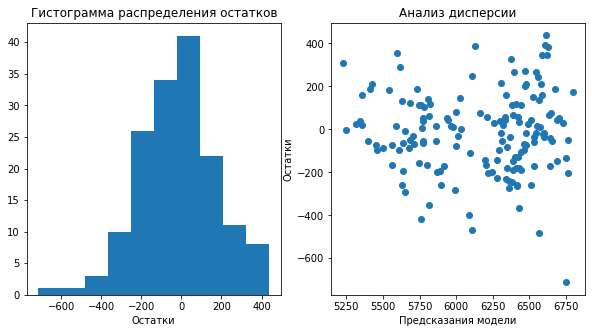

In [104]:
residuals(y_test3, predictions3)

Гистограмма распределения остатков третьей модели показывает равномерное распределение. Дисперсия близка к постоянной. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:




здесь анализ остатка вижу, а вот выше почему-то нет.  У нас три варианта линейной регрессии, и для каждой  проводим анализ остатков, и убеждаемся как по мере улучшения наших признаков которые мы подаём в модель, наши остатки становятся всё более  [гомоскедастичны](https://alfacasting.ru/finansy/cto-takoe-gomoskedasticnost-i-kak-ona-vliyaet-na-statisticeskii-analiz-dannyx), и делаем выводы. В идеале мы должны получить то что слево на [рисунке](https://yandex.ru/images/search?img_url=https%3A%2F%2Fuser-images.githubusercontent.com%2F99672298%2F193196616-4d3ca6da-d9e1-435b-ad70-d1f995596859.png&lr=121661&pos=2&rpt=simage&source=serp&stype=image&text=%22homoscedasticity%20plot%22%20%22heteroscedasticity%20plot%22)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Теперь у нас анализ остатков полный.  Ещё Было бы неплохо проследить в динамики как остатки становятся более гомоскедастичны, что как раз и указывает что наша Линейная модель с новыми признаками улавливает связи в данных всё лучше и лучше

In [105]:
# расчет остатков
#residuals = y_test - predictions

In [106]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#axes[0].hist(residuals)
#axes[0].set_title('Гистограмма распределения остатков')
#axes[0].set_xlabel('Остатки')
#axes[1].scatter(predictions, residuals)
#axes[1].set_xlabel('Предсказания модели')
#axes[1].set_ylabel('Остатки')
#axes[1].set_title('Анализ дисперсии')
#plt.show()

### Вывод

Третья модель наиболее точная, процент ошибок наименьшый - 17%. Принимаем для прогноза.


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- необходимые метрики подсчитаны. Какой-то универсальный метрики нет, поэтому всегда лучше использовать набор      
   
    
    
- есть графический анализ остатков и вывод о недостаточной гомоскедастичности на месте     
     
    
    






<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>


Ошибка:


Не нужно удалять признаки, они могут быть полезны, просто добавь новые 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Тут тоже не забываем анализировать остатки, с помощью этого мы можем понять насколько раскрыт потенциал линейной регрессии. Смысл проекта в том как с помощью преобразования признаков, которые нелинейно связан с целевой, мы можем устранить  недостатки линейной модели, подняв метрику. А затем, добавив дополнительный признак - имя отца, поднять качество прогноза ещё выше. До этого была сделана предобработка данных (убраны выбросы + дубликаты, что тоже помогает модели лучше обучиться),  а будь у нас мультиколлинеарность, можно было заняться и ею. Это самое сложная и важная часть в машинном обучении.  Дальше мы можем поднимать качество прогноза с помощью подбора гиперпараметров и подбора модели, подходящих для данного дтасета, но это уже проще и творчества там уже меньше
    
    
    
<div class="alert alert-warning">




Совет 🤔:



- Можно попробовать еще сгенерировать признаки (заняться feature_engenering). Интеракционные признаки - это когда мы перемножаем признаки, можно использовать средние значения (дисперсию) количественных признаков в группировке по категориальным...Для какой-нибудь нейросети это всё не нужно, они автоматически могут создавать комбинации паттернов, могут автоматически извлекать новые абстрактные признаки. А так как у нас модель простая то для нее возможно пригодится "помощь зала" в виде дополнительно придуманных признаков 
Пример вывода    
        

Составим прогноз для новоприобретаемых коров. Для начала преобразуем датасет дополнив данные столбцами СПО, ЭКЕ,
Сырой протеин. Для этого возьмем средние значения и увеличим средние значения ЭКЕ, Сырой протеин, СПО на 5%.

In [107]:
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [108]:
cow_buy['ЭКЕ (Энергетическая кормовая единица)'] = (ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05)**2
cow_buy['Сырой протеин, г'] = ferma_main['Сырой протеин, г'].mean()*1.05
cow_buy['СПО'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].mean()*1.05
cow_buy['СПО'] = cow_buy['СПО'].apply(lambda x: 0 if x<0.87 else 1 if x>0.87 and x<0.92 else 2)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:


Исправление принято


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



Вот тут неправильно

    ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05**2
    
    
Поставь скобку  
    
    
    
    (ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05)**2
    
    
    
Ниже привёл сравнение    

In [109]:
# код ревьюера

print(10*1.05**2)

(10*1.05)**2

11.025


110.25

In [110]:
linear_cow_buy = cow_buy.drop(['Текущая_жирность,%', 'Текущий_уровень_белок,%'], axis =1)
linear_cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы      Возраст  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес  более_2_лет   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный  менее_2_лет   
2  РефлешнСоверинг    Равнинное          Соверин     Барин  более_2_лет   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный  более_2_лет   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный  более_2_лет   

   ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  СПО  
0                             233.361138       2019.947532    2  
1                             233.361138       2019.947532    2  
2                             233.361138       2019.947532    2  
3                             233.361138       2019.947532    2  
4                             233.361138       2019.947532    2

Нормализуем данные перед прогнозом

In [111]:
l_cat_col_names0 = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст', 'СПО', 'Имя_папы']
l_num_col_names0 = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г']

In [112]:
linear_cow_buy_scaled = scaler.transform(linear_cow_buy[l_num_col_names0])

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Исправлено


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


По поводу использования Scaler и OHE


fit_transform мы не делаем на cow_buy. fit_transform всегда дело на тренировочной выборке. И это легко объяснить, ведь по логике моделирования мы владеем информацией только из тренировочной выборки. Поэтому "обучаемся" (fit_transform) на тренировочной, а  затем "распространяем" обученный scaler на test/реальные дынные на которых делает прогноз
    
    
    

In [113]:
linear_cow_buy_ohe = encoder.transform(linear_cow_buy[l_cat_col_names0]) 

In [114]:
encoder_col_names = encoder.get_feature_names()

In [115]:
linear_cow_buy_ohe = pd.DataFrame(linear_cow_buy_ohe, columns=encoder_col_names)

In [116]:
linear_cow_buy_scaled = pd.DataFrame(linear_cow_buy_scaled, columns=l_num_col_names)

In [117]:
norm_linear_cow_buy = pd.concat([linear_cow_buy_ohe, linear_cow_buy_scaled], axis=1)

In [118]:
norm_linear_cow_buy.head()

x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет  x4_1  x4_2  \
0                 0.0           1.0         0.0             0.0   0.0   1.0   
1                 0.0           0.0         1.0             1.0   0.0   1.0   
2                 1.0           0.0         1.0             0.0   0.0   1.0   
3                 1.0           1.0         0.0             0.0   0.0   1.0   
4                 1.0           0.0         0.0             0.0   0.0   1.0   

   x5_Буйный  x5_Геркулес  x5_Соловчик     ЭКЕ^2  Сырой протеин, г  
0        0.0          1.0          0.0  0.542248          0.517384  
1        1.0          0.0          0.0  0.542248          0.517384  
2        0.0          0.0          0.0  0.542248          0.517384  
3        1.0          0.0          0.0  0.542248          0.517384  
4        1.0          0.0          0.0  0.542248          0.517384

In [119]:
norm_linear_cow_buy['Удой, кг'] = model_lr.predict(norm_linear_cow_buy)
norm_linear_cow_buy['Удой, кг'].sort_values()

13    6125.464878
2     6284.631091
14    6284.631091
8     6284.631091
16    6344.352347
10    6344.352347
1     6375.559732
9     6398.746673
17    6423.319086
5     6423.319086
19    6542.488944
4     6542.488944
7     6569.570576
18    6569.570576
15    6592.757517
3     6592.757517
12    6609.668985
6     6609.668985
0     6609.668985
11    6617.329929
Name: Удой, кг, dtype: float64

Согласно прогноза удой у всех коров более 6000 кг. Т.е. по данному целевому критерию согласно прогноза подходят все коров из выборки.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Что прогноз совсем испортился. Ошибки где-то похоже? И прошу прислать где почитать про доверительный интервал. В курсе мало инфоомации
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Похоже )  Ведь у нас должны вырасти, ведь мы на 5% улучшили кормление наших коров. Попробуй исправить работу со скобками, как я написал выше 

    
    
    И прошу прислать где почитать про доверительный интервал    

    
    
можно использовать np.quantile. Или посчитать с помощью .interval из библиотеки scipy
    

Доверительный интервал прогноза, это интервал в котором будут находиться наши прогнозы с заданной вероятностью. Как правило, вероятность берут равной 95%. Нижней границей интервала будет 0.025 квантиль, а верхней 0.975 на предсказаниях модели.

In [120]:
quantile_025 = np.quantile(predictions3, 0.025)
quantile_975 = np.quantile(predictions3, 0.975)
f'Доверитльный интервал по удою лежит в пределах от {quantile_025:.2f} до {quantile_975:.2f} кг'

'Доверитльный интервал по удою лежит в пределах от 5352.67 до 6748.93 кг'

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



👍




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Прогноз получен, отлично.  Но по заданию мы ещё считаем доверительный интервал

## Обучение модели логистической регрессии

Из всего набора факторов выберим признаки, которые подходят для модели. Целевой признак - Вкус молока. На вкус не влияет порода, возраст, ЭКЕ.

In [121]:
ferma = ferma_main.merge(ferma_dad)
logic_ferma = ferma.drop(['id',
                          'Удой, кг', 
                          'СПО (Сахаро-протеиновое соотношение)',
                          'СПО',
                          'ЭКЕ (Энергетическая кормовая единица)',
                          'Возраст'], axis =1)
logic_ferma['Вкус молока'] = logic_ferma['Вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
logic_ferma.head()

Сырой протеин, г           Порода Тип пастбища порода папы_быка  \
0              1743   Вис Бик Айдиал    Равнинное           Айдиал   
1              2138   Вис Бик Айдиал    Равнинное          Соверин   
2              1854  РефлешнСоверинг    Холмистое          Соверин   
3              2012  РефлешнСоверинг    Холмистое           Айдиал   
4              1675   Вис Бик Айдиал    Равнинное          Соверин   

   Жирность,%  Белок,%  Вкус молока   ЭКЕ^2  Имя Папы  
0        3.58    3.076            1  201.64    Буйный  
1        3.54    3.079            1  163.84  Соловчик  
2        3.59    3.074            0  196.00     Барин  
3        3.40    3.075            0  153.76    Буйный  
4        3.73    3.073            1  163.84     Барин

In [122]:
X = logic_ferma.drop(columns=['Вкус молока'])
y = logic_ferma['Вкус молока']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [124]:
lg_cat_col_names = ['Тип пастбища', 'Имя Папы', 'Порода', 'порода папы_быка']
lg_num_col_names = ['Сырой протеин, г', 'Жирность,%', 'Белок,%']

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Хорошо что не забыла вернуть жирности и белок, а почему ты всё время отказываешься от сгенерированных признаков? Разве кто был отец не может влиять на качество молока? Советую использовать все возможные признаки

In [125]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [126]:
X_train_ohe = encoder.fit_transform(X_train[lg_cat_col_names]) 
X_test_ohe = encoder.transform(X_test[lg_cat_col_names]) 

In [127]:
encoder_col_names = encoder.get_feature_names()

In [128]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [129]:
#приводим значения всех признаков к единой шкале
scaler = StandardScaler()

In [130]:
X_train_scaled = scaler.fit_transform(X_train[lg_num_col_names])
X_test_scaled = scaler.transform(X_test[lg_num_col_names])

In [131]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=lg_num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=lg_num_col_names)

In [132]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [133]:
X_train.head()

x0_Холмистое  x1_Буйный  x1_Геркулес  x1_Соловчик  x2_РефлешнСоверинг  \
0           1.0        0.0          0.0          1.0                 1.0   
1           1.0        0.0          0.0          0.0                 1.0   
2           0.0        1.0          0.0          0.0                 0.0   
3           1.0        1.0          0.0          0.0                 0.0   
4           0.0        0.0          1.0          0.0                 0.0   

   x3_Соверин  Сырой протеин, г  Жирность,%   Белок,%  
0         1.0          1.079523    0.562532 -0.679069  
1         1.0         -0.196920   -1.601817 -1.452568  
2         0.0         -1.386085   -2.563750  1.254677  
3         0.0          0.752230    0.081565  1.254677  
4         0.0          0.828598    0.201807  0.094429

In [134]:
# создаём объект для работы с моделью
clf = LogisticRegression(random_state=RANDOM_STATE)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Не забываем при инициализации модели о random_state, иначе после каждого запуска кода у нас может быть разный результат


</div>


In [135]:
# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

In [136]:
pd.DataFrame(zip(y_test, y_pred), columns = ['test','pred']).head(10) 

test  pred
0     1     1
1     1     1
2     1     1
3     0     0
4     1     1
5     0     1
6     1     1
7     1     1
8     1     1
9     0     0

In [137]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(acc, 3))
print('recall: ',round(recall, 3))
print('precision: ',round(precision, 3))

accuracy:  0.548
recall:  0.818
precision:  0.567


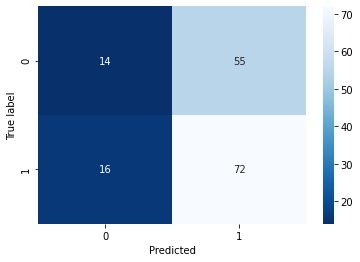

In [138]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Матрица ошибок показывает, что модель ошибочно предсказывает "вкусно" в 55 случае на доступной выборке. 
Модель чаще совершает ошибки FP чаще, чем FN, то есть эффективнее избегает ошибок второго типа.

Precission показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Чем выше эта метрика, тем меньше таких случаев. Поскольку важно выбрать коров со вкусным молоком необходимо повышать этот показать.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


Верное рассуждение



</div>


In [139]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba, y_pred),columns = ['y_valid', 'y_proba', 'y_pred'])
data.head(10)

y_valid   y_proba  y_pred
0        1  0.651578       1
1        1  0.579375       1
2        1  0.685130       1
3        0  0.463682       0
4        1  0.629291       1
5        0  0.593311       1
6        1  0.739584       1
7        1  0.808332       1
8        1  0.698806       1
9        0  0.492375       0

Добавить пороги поможет функция linspace: она разделяет заданный промежуток на несколько более мелких. Посмотрим на то, как модель будет работать при четырёх разных порогах. Для этого укажем в linspace промежуток пороговых значений — от 0.1 до 1:

In [140]:
# создаём переменную, которая будет хранить список новых колонок
columns = []
thresholds = [round(i,3) for i in np.linspace(0,1,num = 10,endpoint=False)]
# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0) 

# выведем 10 случайных строк
data.sample(10)

y_valid   y_proba  y_pred  y_pred_0.0  y_pred_0.1  y_pred_0.2  \
123        1  0.718862       1           1           1           1   
64         1  0.712247       1           1           1           1   
12         1  0.741585       1           1           1           1   
151        0  0.645348       1           1           1           1   
45         1  0.500918       1           1           1           1   
24         1  0.547287       1           1           1           1   
120        0  0.507016       1           1           1           1   
122        1  0.468747       0           1           1           1   
100        1  0.708760       1           1           1           1   
2          1  0.685130       1           1           1           1   

     y_pred_0.3  y_pred_0.4  y_pred_0.5  y_pred_0.6  y_pred_0.7  y_pred_0.8  \
123           1           1           1           1           1           0   
64            1           1           1           1           1           0   
12            1           1           1           1           1           0   
151           1           1           1           1           0           0   
45            1           1           1           0           0           0   
24            1           1           1           0           0           0   
120           1           1           1           0           0           0   
122           1           1           0           0           0           0   
100           1           1           1           1           1           0   
2             1           1           1           1           0           0   

     y_pred_0.9  
123           0  
64            0  
12            0  
151           0  
45            0  
24            0  
120           0  
122           0  
100           0  
2             0

При погроге 0,7 модель начинанает совершать меньше ошибок FP.

accuracy:  0.567
recall:  0.307
precision:  0.794


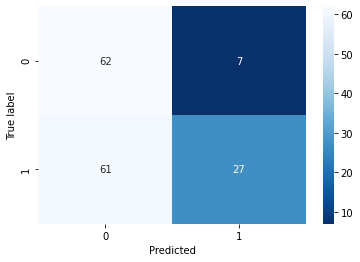

In [141]:
acc = accuracy_score(y_test, data['y_pred_0.7'])
recall = recall_score(y_test, data['y_pred_0.7'])
precision = precision_score(y_test, data['y_pred_0.7'])

print('accuracy: ',round(acc, 3))
print('recall: ',round(recall, 3))
print('precision: ',round(precision, 3))

cm = confusion_matrix(y_test, data['y_pred_0.7'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Количество ошибок значительно снизилось. Но цель снизить FP до 0, поэтому увеличим порог.

In [142]:
columns = []
thresholds = [round(i,3) for i in np.linspace(0,1,num = 100,endpoint=False)]
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0) 

accuracy:  0.516
recall:  0.136
precision:  1.0


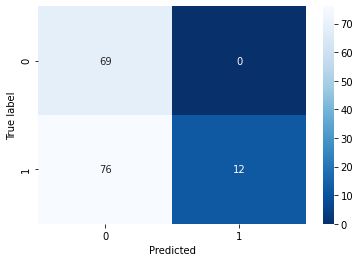

In [143]:
acc = accuracy_score(y_test, data['y_pred_0.75'])
recall = recall_score(y_test, data['y_pred_0.75'])
precision = precision_score(y_test, data['y_pred_0.75'])

print('accuracy: ',round(acc, 3))
print('recall: ',round(recall, 3))
print('precision: ',round(precision, 3))

cm = confusion_matrix(y_test, data['y_pred_0.75'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Составим прогноз для новоприобретаемых коров. Для начала преобразуем датасет дополнив данные.

In [144]:
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  \
0                3.58                    3.076  более_2_лет   
1                3.54                    3.081  менее_2_лет   
2                3.59                    3.074  более_2_лет   
3                3.40                    3.061  более_2_лет   
4                3.64                    3.074  более_2_лет   

   ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  СПО  
0                             233.361138       2019.947532    2  
1                             233.361138       2019.947532    2  
2                             233.361138       2019.947532    2  
3                             233.361138       2019.947532    2  
4                             233.361138       2019.947532    2

In [145]:
cow_buy['Сырой протеин, г'] = ferma_main['Сырой протеин, г'].mean()*1.05
#cow_buy['Сырой протеин, г'] = ferma_main['Сырой протеин, г'].median()*1.05

In [146]:
logic_cow_buy = cow_buy.drop(['Возраст', 'ЭКЕ (Энергетическая кормовая единица)', 'СПО'], axis =1)
logic_cow_buy = logic_cow_buy[['Порода',
                               'Тип пастбища', 
                               'порода папы_быка', 
                               'Имя_папы', 
                               'Сырой протеин, г', 
                               'Текущая_жирность,%', 
                               'Текущий_уровень_белок,%']]
logic_cow_buy

Порода Тип пастбища порода папы_быка  Имя_папы  Сырой протеин, г  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес       2019.947532   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный       2019.947532   
2   РефлешнСоверинг    Равнинное          Соверин     Барин       2019.947532   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный       2019.947532   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный       2019.947532   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес       2019.947532   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес       2019.947532   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный       2019.947532   
8   РефлешнСоверинг    Равнинное          Соверин     Барин       2019.947532   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный       2019.947532   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик       2019.947532   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес       2019.947532   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес       2019.947532   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин       2019.947532   
14  РефлешнСоверинг    Равнинное          Соверин     Барин       2019.947532   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный       2019.947532   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик       2019.947532   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес       2019.947532   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный       2019.947532   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный       2019.947532   

    Текущая_жирность,%  Текущий_уровень_белок,%  
0                 3.58                    3.076  
1                 3.54                    3.081  
2                 3.59                    3.074  
3                 3.40                    3.061  
4                 3.64                    3.074  
5                 3.63                    3.053  
6                 3.58                    3.076  
7                 3.57                    3.079  
8                 3.59                    3.074  
9                 3.40                    3.079  
10                3.73                    3.055  
11                3.73                    3.073  
12                3.68                    3.046  
13                3.42                    3.075  
14                3.59                    3.074  
15                3.40                    3.065  
16                3.73                    3.079  
17                3.77                    3.053  
18                3.34                    3.069  
19                3.64                    3.074

Нормализуем данные перед прогнозом

In [147]:
lg_cat_col_names0 = ['Тип пастбища', 'Имя_папы' , 'Порода', 'порода папы_быка']
lg_num_col_names0 = ['Сырой протеин, г', 'Текущая_жирность,%', 'Текущий_уровень_белок,%']

In [148]:
logic_cow_buy_scaled = scaler.transform(logic_cow_buy[lg_num_col_names0])

In [149]:
logic_cow_buy_ohe = encoder.transform(logic_cow_buy[lg_cat_col_names0]) 

In [150]:
lg_encoder_col_names = encoder.get_feature_names()

In [151]:
logic_cow_buy_ohe = pd.DataFrame(logic_cow_buy_ohe, columns=lg_encoder_col_names)

In [152]:
logic_cow_buy_scaled = pd.DataFrame(logic_cow_buy_scaled, columns=lg_num_col_names0)

In [153]:
norm_logic_cow_buy = pd.concat([logic_cow_buy_ohe, logic_cow_buy_scaled], axis=1)

In [154]:
norm_logic_cow_buy.sample(5)

x0_Холмистое  x1_Буйный  x1_Геркулес  x1_Соловчик  x2_РефлешнСоверинг  \
16           1.0        0.0          0.0          1.0                 0.0   
11           0.0        0.0          1.0          0.0                 1.0   
9            1.0        1.0          0.0          0.0                 1.0   
8            0.0        0.0          0.0          0.0                 1.0   
18           0.0        1.0          0.0          0.0                 0.0   

    x3_Соверин  Сырой протеин, г  Текущая_жирность,%  Текущий_уровень_белок,%  
16         1.0          0.517384            0.742894                 1.254677  
11         1.0          0.517384            0.742894                -1.065819  
9          0.0          0.517384           -1.241093                 1.254677  
8          1.0          0.517384           -0.098797                -0.679069  
18         1.0          0.517384           -1.601817                -2.612816

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Ошибка ❌:





Ниже я показал На каких данных у тебя обучалась Логистическая регрессия, и на каких данных делался прогноз по cow_buy. 
    
    
А вы когда мы используем обученный scaler на другом датасете, важно соблюдать тот же порядок столбцов и использовать их исходные названия. Ведь scaler обучается на определенных столбцах и сохраняет параметры масштабирования, такие как среднее значение и стандартное отклонение, для этих столбцов. Если всё перемешать, то и получится . Сырой протеин под миллион   

In [155]:
# код ревьюера
X_train

x0_Холмистое  x1_Буйный  x1_Геркулес  x1_Соловчик  x2_РефлешнСоверинг  \
0             1.0        0.0          0.0          1.0                 1.0   
1             1.0        0.0          0.0          0.0                 1.0   
2             0.0        1.0          0.0          0.0                 0.0   
3             1.0        1.0          0.0          0.0                 0.0   
4             0.0        0.0          1.0          0.0                 0.0   
..            ...        ...          ...          ...                 ...   
466           1.0        0.0          0.0          0.0                 1.0   
467           0.0        0.0          1.0          0.0                 0.0   
468           0.0        0.0          1.0          0.0                 1.0   
469           0.0        1.0          0.0          0.0                 0.0   
470           0.0        1.0          0.0          0.0                 0.0   

     x3_Соверин  Сырой протеин, г  Жирность,%   Белок,%  
0           1.0          1.079523    0.562532 -0.679069  
1           1.0         -0.196920   -1.601817 -1.452568  
2           0.0         -1.386085   -2.563750  1.254677  
3           0.0          0.752230    0.081565  1.254677  
4           0.0          0.828598    0.201807  0.094429  
..          ...               ...         ...       ...  
466         0.0          1.565008    0.021444  0.481179  
467         0.0         -0.998788    0.682773 -1.065819  
468         0.0         -0.818777    0.141686 -1.839317  
469         0.0          0.130373    0.021444 -0.292320  
470         0.0         -0.862416   -2.082784 -0.292320  

[471 rows x 9 columns]

In [156]:
y_proba = clf.predict_proba(norm_logic_cow_buy)[:,1]


In [157]:
y_proba_075 = [1 if x>=0.75 else 0 for x in y_proba]

In [158]:
y_proba_07 = [1 if x>=0.7 else 0 for x in y_proba]

In [159]:
data = pd.DataFrame(zip(y_proba, y_proba_075, y_proba_07), columns = ['y_valid', 'y_proba_075', 'y_proba_07'])
data

y_valid  y_proba_075  y_proba_07
0   0.693886            0           0
1   0.636727            0           0
2   0.555479            0           0
3   0.311189            0           0
4   0.535856            0           0
5   0.142493            0           0
6   0.693886            0           0
7   0.600040            0           0
8   0.555479            0           0
9   0.711894            0           1
10  0.204833            0           0
11  0.550833            0           0
12  0.129794            0           0
13  0.643075            0           0
14  0.555479            0           0
15  0.397241            0           0
16  0.712836            0           1
17  0.162519            0           0
18  0.311480            0           0
19  0.535856            0           0

При пороге 0,75 ни одна корова из выборки не подходит по запросу качества молока. При снижении порога до 0,7 получилось выделить 2 коровы с наилучшими вкусовыми качествами молока с id 9 и 16.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV6</b></font>



Успех 👍:



Рекомендации получены

In [160]:
data = pd.DataFrame(zip(norm_logic_cow_buy, y_proba),
             columns = ['y_valid', 'y_proba'])
data['y_proba_07'] = data['y_proba'].apply(lambda x: 1 if x>=0.7 else 0)
print(data[data['y_proba_07']!=0].count())
data[data['y_proba_07']!=0]

y_valid       0
y_proba       0
y_proba_07    0
dtype: int64


Empty DataFrame
Columns: [y_valid, y_proba, y_proba_07]
Index: []

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV5</b></font>



Совет 🤔:


Печально. Можно ещё попробовать вместо средней в .mean()*1.05 использовать моду. Но все равно каких-то коров порекомендовать надо, не получится использовать порог с которым у нас 0 FP - снизим требования по порогу. 

    
Рекомендую тут вывести вероятность 1, чтобы все было перед глазами    

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
    
Что так с y_proba? Почему 1? Ошибки где-то похоже? Сырой протеин, г? 
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Совет 🤔:



Похоже ошибка.  Написал выше.  Действительно когда протеина 780023, то каждая коровка гарантирована не молоко а нектар )


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:




Тут используешь .predict (по умолчанию порог 0,5). Но мы ведь нашли порог который позволяет минимизировать риск плохой точности прогноза вкусного молока. Используй тут  .predict_proba, а затем ко второму столбцу (он раз показывает уверенность модели в прогнозе единички - молоко вкусное) примени порог, поставив единицу только там где модель уверена в своём прогнозе больше чем найденный порог
    
    
Или можешь столбец Вкус молока  вывести как раз второй столбец из    .predict_proba, а потом просто посмотри где уверенность больше порога, как раз эти варианты нам и подойдут

## Итоговые выводы

В данном проекте была проведена предобработка данных, в ходе который данные были проверены на наличие пропусков и дубликатов. Исправлены типы данных. Устранены все проблемы с данными.

Был проведен статистический анализ всех признаков с простроением графиков для каждого признака. На этом этапе избавились от выявленных выбросов. СПО перевели в качественный признак в связи с особенностями его распределения.

На этапе корреляционного анализа изучены взаимосвязи между целевым и входными признаками.

Было построено 3 модели простой линейной регрессии. По всем моделям был произведен расчет метрик. Распределения остатков каждой модели показала равномерное распределение. Дисперсия близка к постоянной. Но по метрикам модель 3   смогла объяснить наибольшее количество вариации - 83%.

По полученному прогнозу удоя все коровы соответсвуют требованиям покупателя.

Для опреления вкусовых характеристик молока была построена модель логистической регрессии. По вкусовым характеристикам все коровы из выборки не прошли отбор. 

При пороге 0,75 ни одна корова из выборки не подходит по запросу качества молока. При снижении порога до 0,7 получилось выделить 2 коровы с наилучшими вкусовыми качествами молока с id 9 и 16.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках,



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Анна, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, графики оформлены аккуратно, код подробно прокомментирован. Проект конечно очень непростой с точки зрения обьема.  Теперь первый проект касающийся непосредственно машинного обучения стал гораздо насыщенней, теперь как раньше мы не ограничиваемся перебором лучших гиперпараметров, а можем увидеть как работать с признаками (что на самом деле и составляет большую часть работы дата-сантиста) и как с помощью этого мы можем нивелировать те или иные недостатки той или иной модели и добиться лучшего результата

    

    
    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    


Обязательное к исправлению:



    
- не забываем начать за вступления    
    
    
    
- не забываем оформить необходимые функции



- предпочтительно  использование как гистограммы, так и ящика с усами в анализе колличественных данных 


- на графике смотрим зависимость между таргетом и эко (на основе этого и делается вывод что нужно попробовать дополнить признаки эко в квадрате)    




- не забываем при инициализации модели о random_state - добиваемся воспроизводимости результатов


- при шкалировании и кодировании  на train делаем .fit векторайз, на test/valid .transform


    
- при моделировании не использованы все возможные признаки

    
- мы проводим улучшение модели в два этапа    

    
- не забываем анализировать динамику в остатках    

    

- не забываем рассчитать доверительный интервал прогноза удоя

    
    
    
- общий вывод (лицо проекта) стоит дописать


    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

Многое что исправлено, кое-что осталось :

    
    
- описание проекта все нет    
    
- не забываем оформить необходимые функции,  это облегчит нашу работу, сделает наш код лаконичный и понятнее
    
    
-  попробуй использовать все все возможные признаки (Единственное исключение это убираем жирность и белок при прогнозе удоя). А вот например ЭКО стоит использовать, даже после ввода ЭКО в квадрате
    
    

-  доверительный интервал прогноза удоя (подсказал)
    
    
- не везде проведён анализ остатка (У нас три вариации линейной регрессии, и для каждой смотрим что у нас с остатками)
    
    
    
- и предлагаю поставить скобки при расчете, тогда возможно решится проблема "упавшими удоями" )


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    

Что осталось из красного:

 
    

-  порог мы нашли, осталось только его использовать при прогнозе на cow_buy  


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>

Спасибо за работу!    

    

Что осталось из красного:

 

    
Поправить преобразование данных на cow_buy 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV5</b></font>

Спасибо за работу!    

    
    
Не получается выбрать  "лучшие варианты из лучших", выберем варианты "лучшие из худших". Но какую-то рекомендацию оставить надо   


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV6</b></font>

Спасибо за работу! Красного не осталось.   

    
Это было непросто, пришло очень много поработать на всех итерациях. Проект был сильно усложнён, но думаю с такими проектами (следующий тоже будет непростым), обучение пойдет гораздо качественнее и быстрее.Многие желтые советы использованы. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.


  
Отличная работа Анна. Желаю успехов в дальнейшей учебе!
